In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [177]:
df = pd.read_csv('postnataldata.csv')

In [178]:
df.head(50)

,Timestamp,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,6/14/2022 20:02,35-40,Yes,Yes,Two or more days a week,Yes,Yes,Yes,No,Yes,Yes
1,6/14/2022 20:03,40-45,Yes,No,No,Yes,Yes,No,Yes,Yes,No
2,6/14/2022 20:04,35-40,Yes,No,Yes,Yes,Yes,Yes,No,Sometimes,No
3,6/14/2022 20:05,35-40,Yes,Yes,Yes,Yes,No,Yes,Maybe,No,No
4,6/14/2022 20:06,40-45,Yes,No,Two or more days a week,Yes,No,Yes,No,Yes,No
5,6/14/2022 20:06,30-35,No,No,Yes,Yes,Yes,Yes,No,No,Yes
6,6/14/2022 20:06,40-45,No,Yes,No,No,No,Yes,No,No,Yes
7,6/14/2022 20:07,35-40,Yes,No,Yes,Yes,No,Yes,No,No,No
8,6/14/2022 20:07,35-40,Yes,Yes,No,Yes,No,No,No,No,Yes
9,6/14/2022 20:11,30-35,Sometimes,Yes,Two or more days a week,No,Yes,Yes,No,Sometimes,Not interested to say


In [179]:
df.shape

(1503, 11)

In [180]:
df.isnull().sum()

Timestamp                                     0
Age                                           0
Feeling sad or Tearful                        0
Irritable towards baby & partner              6
Trouble sleeping at night                     0
Problems concentrating or making decision    12
Overeating or loss of appetite                0
Feeling anxious                               0
Feeling of guilt                              9
Problems of bonding with baby                 0
Suicide attempt                               0
dtype: int64

In [181]:
df.columns

Index(['Timestamp', 'Age', 'Feeling sad or Tearful',
       'Irritable towards baby & partner', 'Trouble sleeping at night',
       'Problems concentrating or making decision',
       'Overeating or loss of appetite', 'Feeling anxious', 'Feeling of guilt',
       'Problems of bonding with baby', 'Suicide attempt'],
      dtype='object')

In [182]:
df['Feeling sad or Tearful'].describe

<bound method NDFrame.describe of 0             Yes
1             Yes
2             Yes
3             Yes
4             Yes
          ...    
1498          Yes
1499    Sometimes
1500           No
1501           No
1502    Sometimes
Name: Feeling sad or Tearful, Length: 1503, dtype: object>

In [183]:
df["Age"].value_counts()

Age
40-45    364
35-40    349
30-35    338
45-50    271
25-30    181
Name: count, dtype: int64

In [184]:
df["Feeling sad or Tearful"].value_counts()

Feeling sad or Tearful
Yes          536
No           524
Sometimes    443
Name: count, dtype: int64

In [185]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

In [186]:
df.head()

,Timestamp,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,2022-06-14 20:02:00,35-40,Yes,Yes,Two or more days a week,Yes,Yes,Yes,No,Yes,Yes
1,2022-06-14 20:03:00,40-45,Yes,No,No,Yes,Yes,No,Yes,Yes,No
2,2022-06-14 20:04:00,35-40,Yes,No,Yes,Yes,Yes,Yes,No,Sometimes,No
3,2022-06-14 20:05:00,35-40,Yes,Yes,Yes,Yes,No,Yes,Maybe,No,No
4,2022-06-14 20:06:00,40-45,Yes,No,Two or more days a week,Yes,No,Yes,No,Yes,No


In [187]:
df[df.isna().any(axis = 1)]

,Timestamp,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
260,2022-06-15 22:24:00,35-40,No,Yes,Yes,NaN,No,Yes,No,Yes,Yes
261,2022-06-15 22:24:00,40-45,Yes,Yes,Two or more days a week,NaN,Not at all,Yes,NaN,Yes,Yes
262,2022-06-15 22:24:00,35-40,Yes,NaN,Yes,NaN,Yes,Yes,NaN,No,No
263,2022-06-15 22:24:00,40-45,Yes,NaN,No,NaN,No,Yes,NaN,Sometimes,No
721,2022-06-15 22:24:00,35-40,No,Yes,Yes,NaN,No,Yes,No,Yes,Yes
722,2022-06-15 22:24:00,40-45,Yes,Yes,Two or more days a week,NaN,Not at all,Yes,NaN,Yes,Yes
723,2022-06-15 22:24:00,35-40,Yes,NaN,Yes,NaN,Yes,Yes,NaN,No,No
724,2022-06-15 22:24:00,40-45,Yes,NaN,No,NaN,No,Yes,NaN,Sometimes,No
1146,2022-06-15 22:24:00,35-40,No,Yes,Yes,NaN,No,Yes,No,Yes,Yes
1147,2022-06-15 22:24:00,40-45,Yes,Yes,Two or more days a week,NaN,Not at all,Yes,NaN,Yes,Yes


In [188]:
df.select_dtypes(include=['object']).fillna(value='Not interested to say', inplace=True)

In [189]:
df.iloc[261: 264]

,Timestamp,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
261,2022-06-15 22:24:00,40-45,Yes,Yes,Two or more days a week,NaN,Not at all,Yes,NaN,Yes,Yes
262,2022-06-15 22:24:00,35-40,Yes,NaN,Yes,NaN,Yes,Yes,NaN,No,No
263,2022-06-15 22:24:00,40-45,Yes,NaN,No,NaN,No,Yes,NaN,Sometimes,No


In [190]:
 df=df.dropna()

In [191]:
df.isnull().sum()

Timestamp                                    0
Age                                          0
Feeling sad or Tearful                       0
Irritable towards baby & partner             0
Trouble sleeping at night                    0
Problems concentrating or making decision    0
Overeating or loss of appetite               0
Feeling anxious                              0
Feeling of guilt                             0
Problems of bonding with baby                0
Suicide attempt                              0
dtype: int64

In [192]:
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
Index: 1491 entries, 0 to 1502
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Timestamp                                  1491 non-null   datetime64[ns]
 1   Age                                        1491 non-null   object        
 2   Feeling sad or Tearful                     1491 non-null   object        
 3   Irritable towards baby & partner           1491 non-null   object        
 4   Trouble sleeping at night                  1491 non-null   object        
 5   Problems concentrating or making decision  1491 non-null   object        
 6   Overeating or loss of appetite             1491 non-null   object        
 7   Feeling anxious                            1491 non-null   object        
 8   Feeling of guilt                           1491 non-null   object        
 9   Problems of bonding with

# EDA

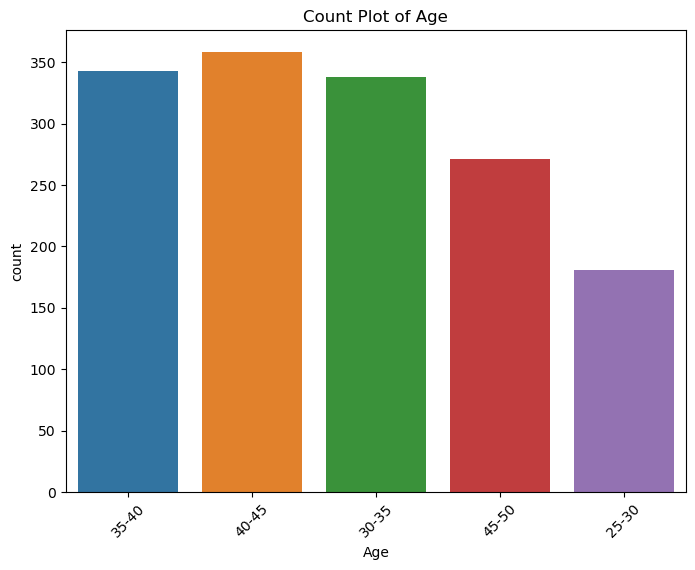

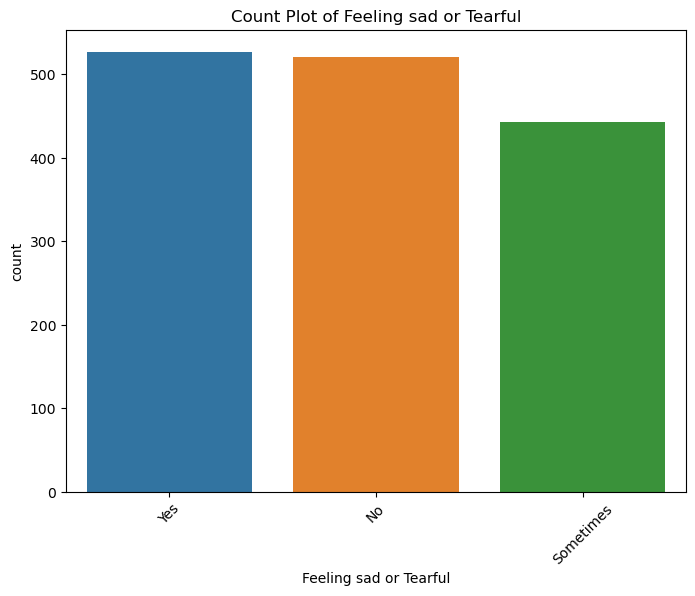

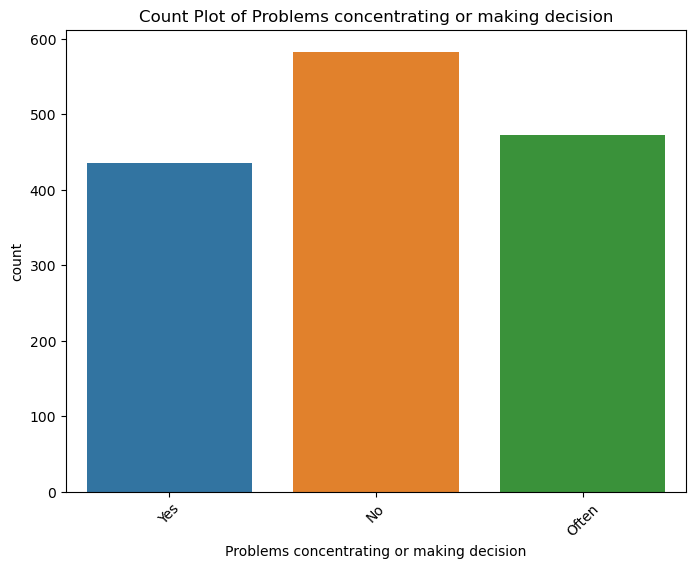

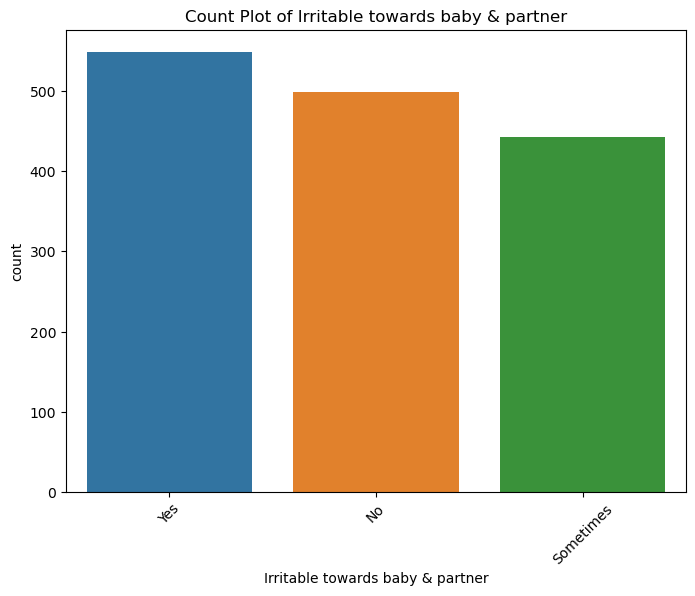

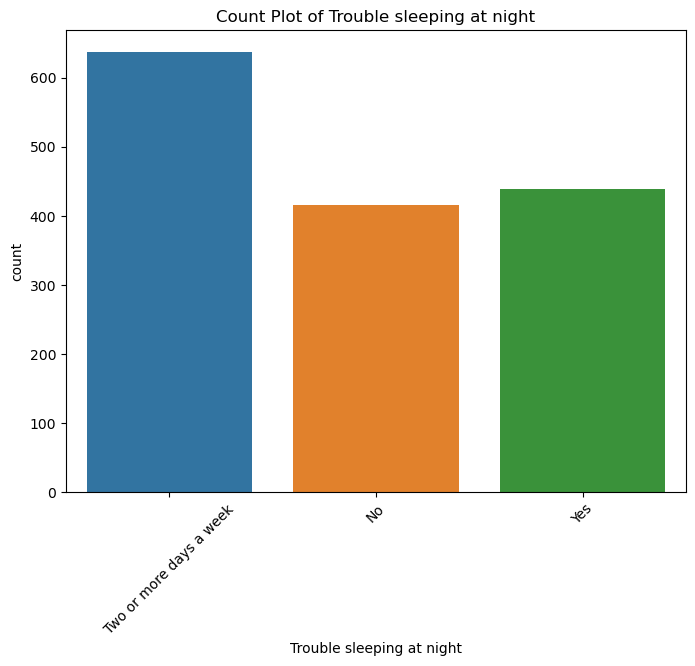

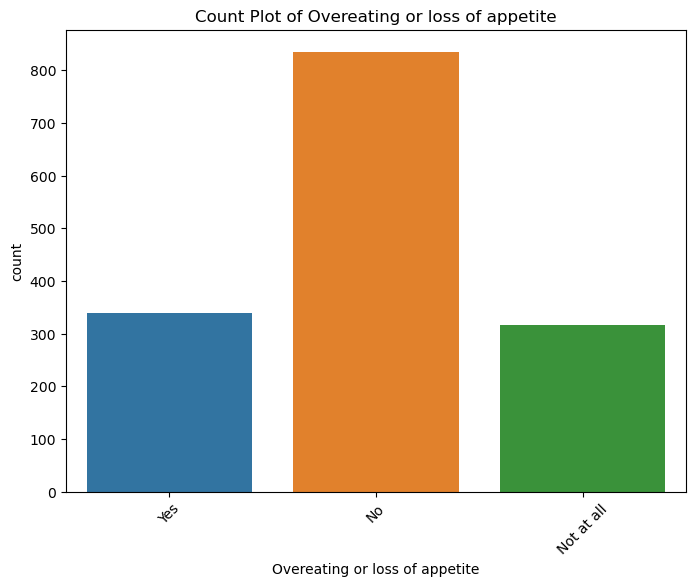

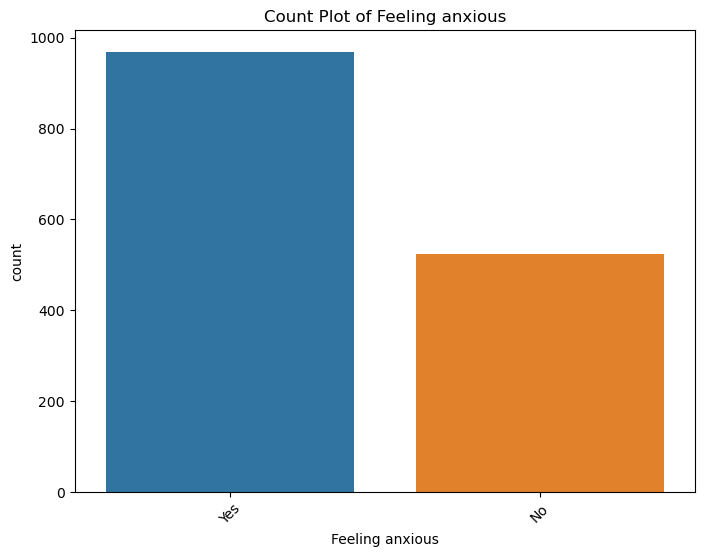

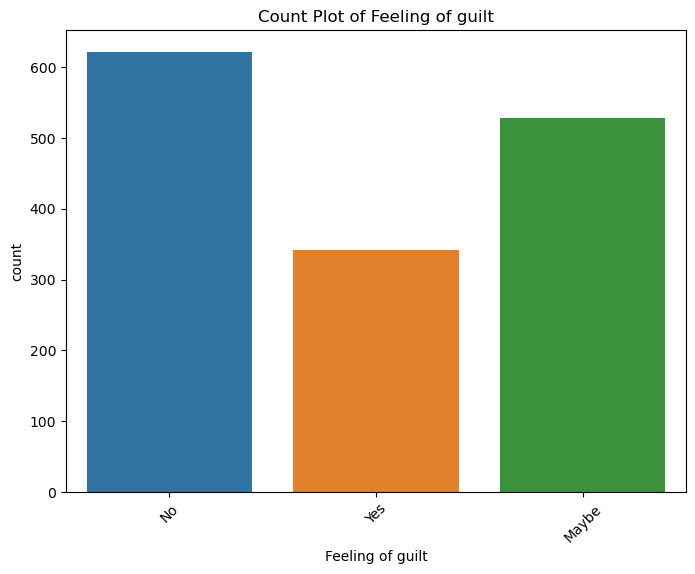

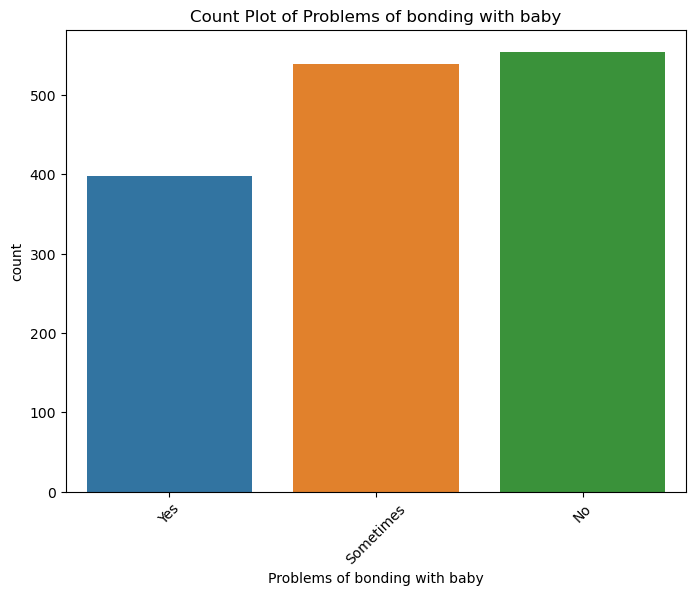

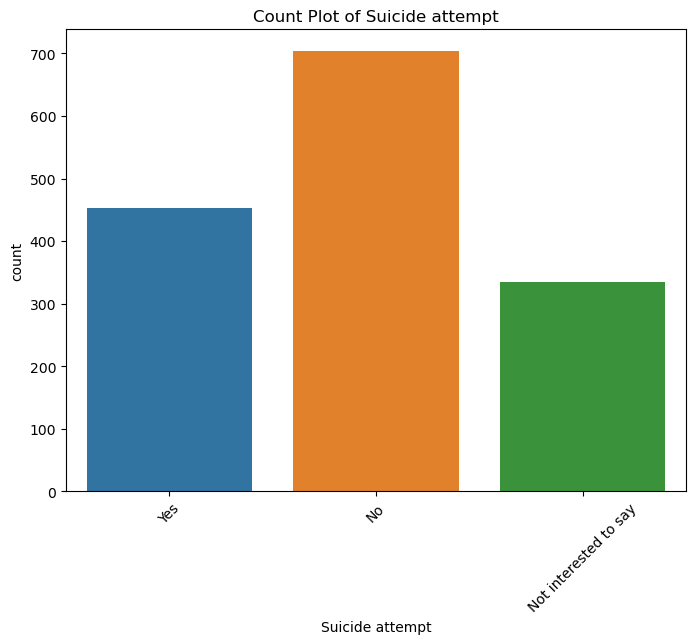

In [193]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count plot for categorical variables
categorical_cols = ['Age', 'Feeling sad or Tearful','Problems concentrating or making decision','Irritable towards baby & partner',
                    'Trouble sleeping at night', 'Overeating or loss of appetite', 'Feeling anxious',
                    'Feeling of guilt', 'Problems of bonding with baby', 'Suicide attempt']

for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=df)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.show()


<Figure size 800x600 with 0 Axes>

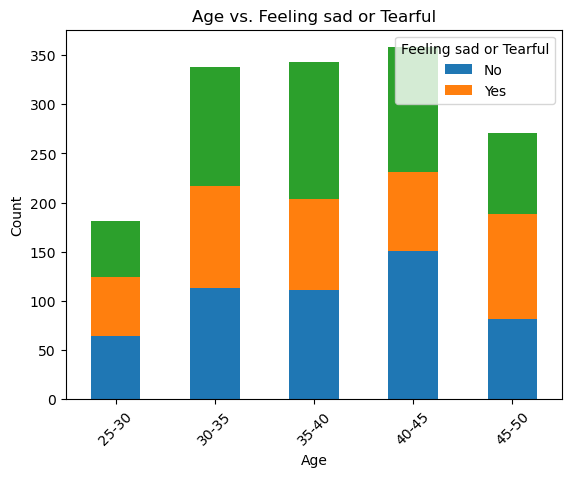

<Figure size 800x600 with 0 Axes>

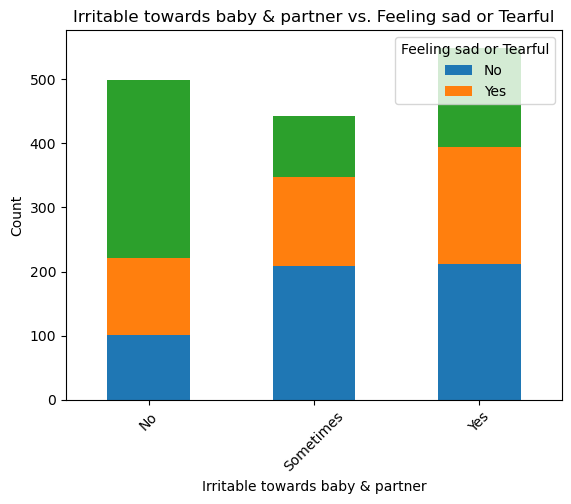

<Figure size 800x600 with 0 Axes>

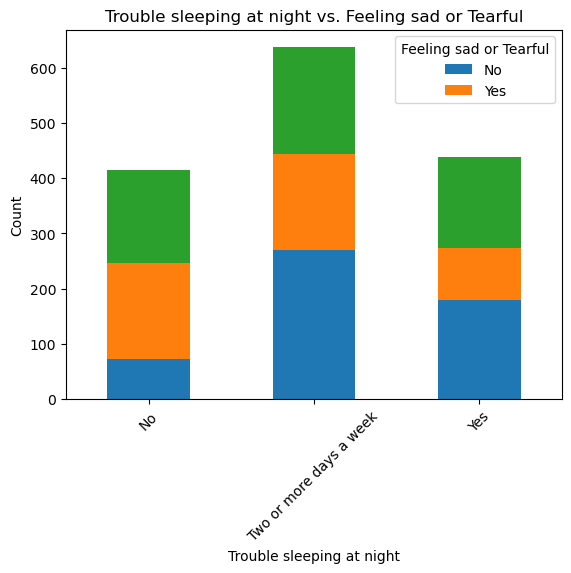

<Figure size 800x600 with 0 Axes>

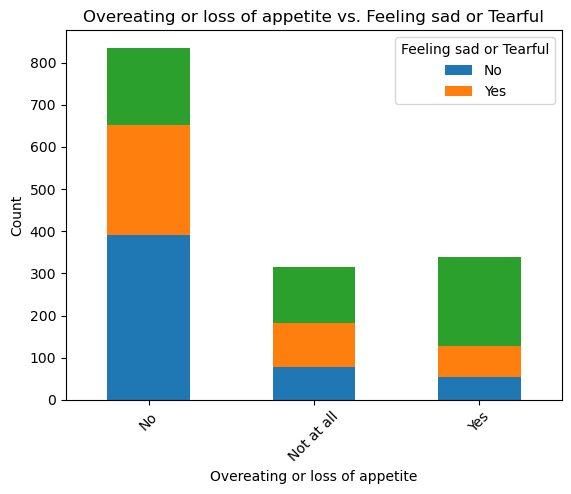

<Figure size 800x600 with 0 Axes>

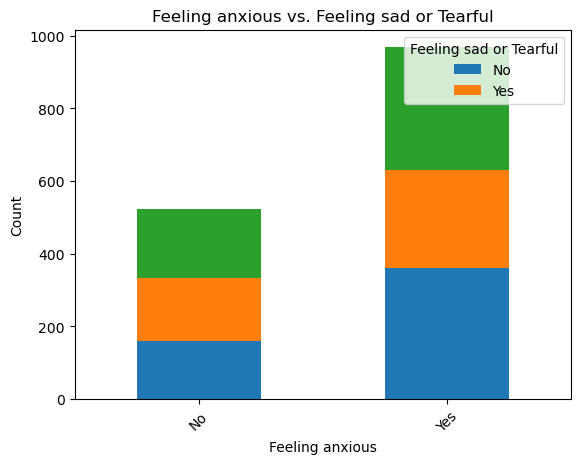

<Figure size 800x600 with 0 Axes>

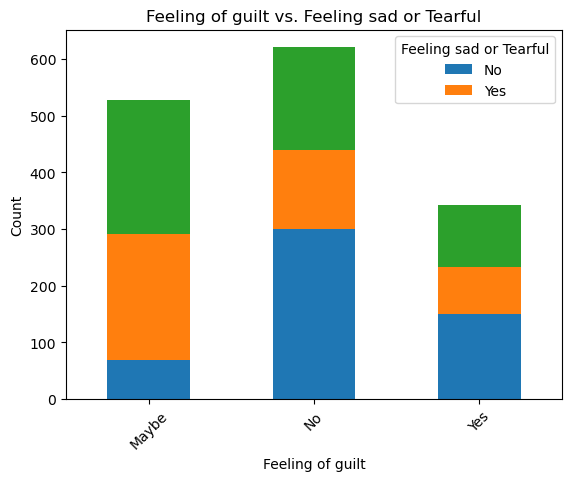

<Figure size 800x600 with 0 Axes>

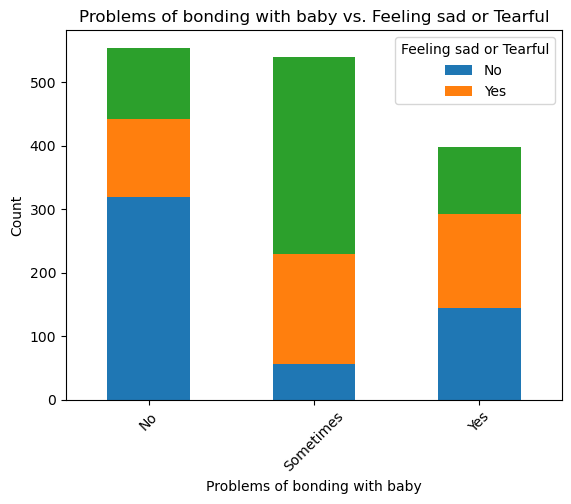

<Figure size 800x600 with 0 Axes>

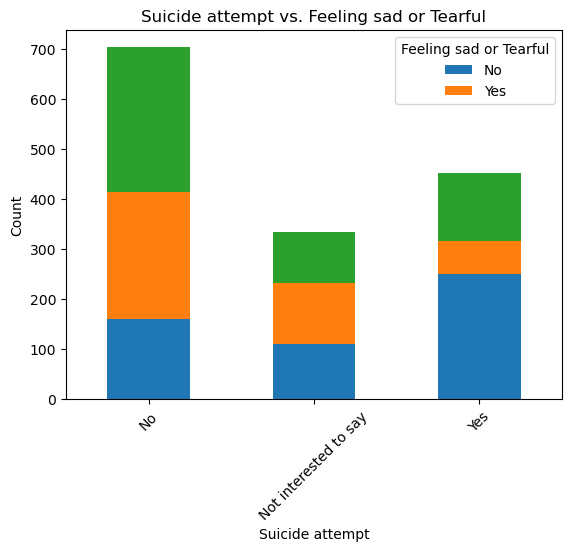

In [194]:
categorical_cols = ['Age', 'Irritable towards baby & partner', 'Trouble sleeping at night', 
                    'Overeating or loss of appetite', 'Feeling anxious', 'Feeling of guilt', 
                    'Problems of bonding with baby', 'Suicide attempt']

for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    grouped_data = df.groupby([col, 'Feeling sad or Tearful']).size().unstack()
    grouped_data.plot(kind='bar', stacked=True)
    plt.title(f'{col} vs. Feeling sad or Tearful')
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Feeling sad or Tearful', loc='upper right', labels=['No', 'Yes'])
    plt.show()


# BIVARIATE ANALYSIS

Cross-tabulation between Feeling sad or Tearful and Age:

Age                     25-30  30-35  35-40  40-45  45-50
Feeling sad or Tearful                                   
No                         64    113    111    151     82
Sometimes                  60    104     93     80    106
Yes                        57    121    139    127     83


Cross-tabulation between Feeling sad or Tearful and Irritable towards baby & partner:

Irritable towards baby & partner   No  Sometimes  Yes
Feeling sad or Tearful                               
No                                101        208  212
Sometimes                         121        140  182
Yes                               277         95  155


Cross-tabulation between Feeling sad or Tearful and Trouble sleeping at night:

Trouble sleeping at night   No  Two or more days a week  Yes
Feeling sad or Tearful                                      
No                          72                      270  179
Sometimes                  1

<Figure size 800x600 with 0 Axes>

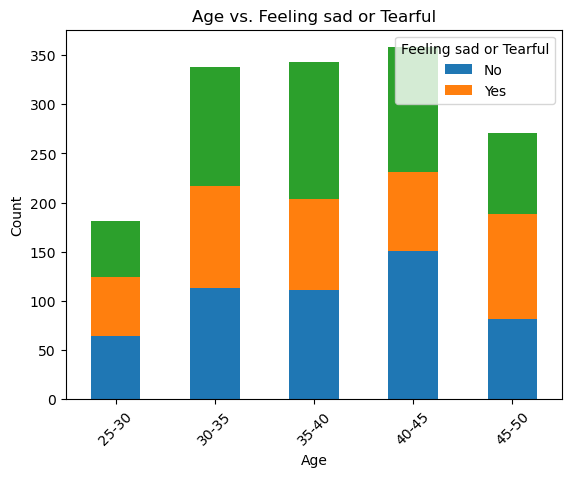

<Figure size 800x600 with 0 Axes>

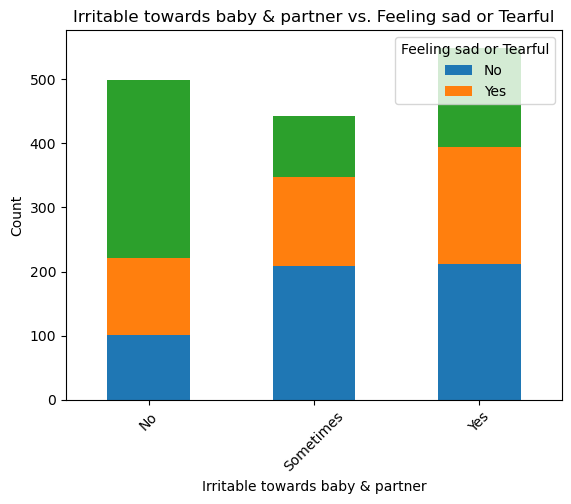

<Figure size 800x600 with 0 Axes>

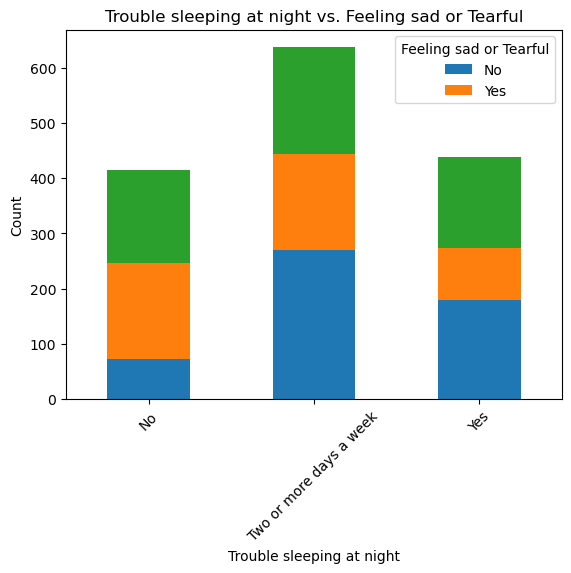

<Figure size 800x600 with 0 Axes>

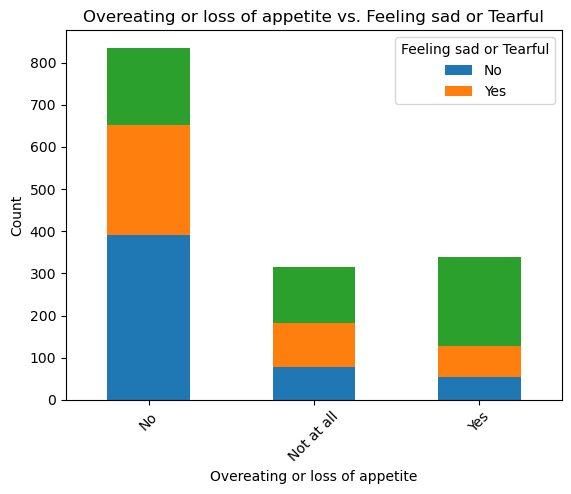

<Figure size 800x600 with 0 Axes>

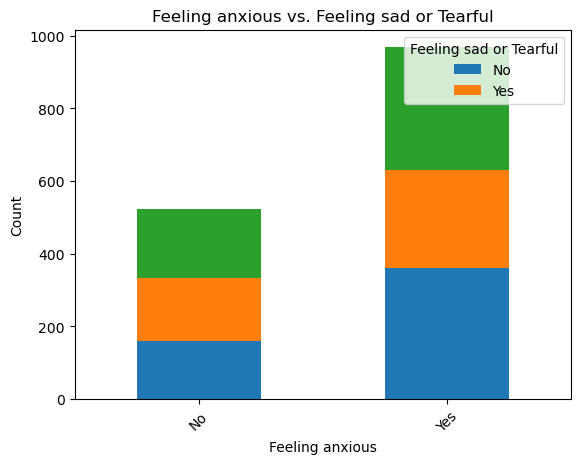

<Figure size 800x600 with 0 Axes>

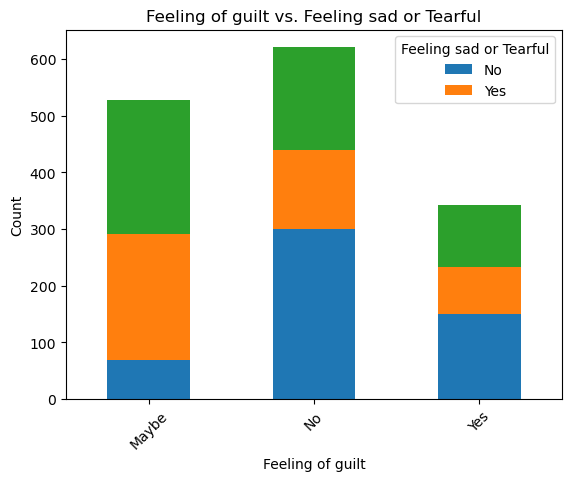

<Figure size 800x600 with 0 Axes>

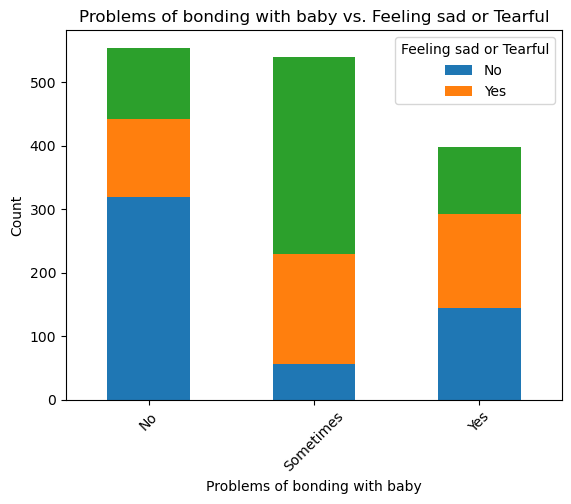

<Figure size 800x600 with 0 Axes>

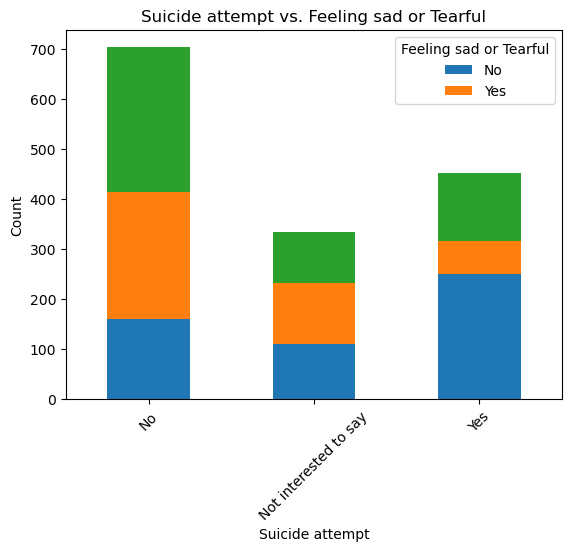

Chi-square test between Age and Feeling sad or Tearful:
Chi-square value: 29.268567205746443
p-value: 0.00028445685049194357


Chi-square test between Irritable towards baby & partner and Feeling sad or Tearful:
Chi-square value: 148.49100709600623
p-value: 4.286156810848934e-31


Chi-square test between Trouble sleeping at night and Feeling sad or Tearful:
Chi-square value: 92.66134469530456
p-value: 3.580859905296411e-19


Chi-square test between Overeating or loss of appetite and Feeling sad or Tearful:
Chi-square value: 206.9504064807154
p-value: 1.2031047558759763e-43


Chi-square test between Feeling anxious and Feeling sad or Tearful:
Chi-square value: 7.204187511091055
p-value: 0.02726657310115196


Chi-square test between Feeling of guilt and Feeling sad or Tearful:
Chi-square value: 176.68589447669524
p-value: 3.838890938651206e-37


Chi-square test between Problems of bonding with baby and Feeling sad or Tearful:
Chi-square value: 309.7480937801168
p-value: 8.547317892496556

In [195]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Load your data
# df = pd.read_csv('your_dataset.csv')  # Load your dataset here

# List of categorical variables for bivariate analysis
categorical_cols = ['Age', 'Irritable towards baby & partner', 'Trouble sleeping at night', 
                    'Overeating or loss of appetite', 'Feeling anxious', 'Feeling of guilt', 
                    'Problems of bonding with baby', 'Suicide attempt']

# Bivariate analysis: Cross-tabulations
for col in categorical_cols:
    cross_tab = pd.crosstab(df['Feeling sad or Tearful'], df[col])
    print(f'Cross-tabulation between Feeling sad or Tearful and {col}:\n')
    print(cross_tab)
    print('\n')

# Bivariate analysis: Stacked bar plots
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    stacked_data = df.groupby([col, 'Feeling sad or Tearful']).size().unstack()
    stacked_data.plot(kind='bar', stacked=True)
    plt.title(f'{col} vs. Feeling sad or Tearful')
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Feeling sad or Tearful', loc='upper right', labels=['No', 'Yes'])
    plt.show()

# Bivariate analysis: Chi-square test
for col in categorical_cols:
    contingency_table = pd.crosstab(df[col], df['Feeling sad or Tearful'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f'Chi-square test between {col} and Feeling sad or Tearful:')
    print(f'Chi-square value: {chi2}')
    print(f'p-value: {p}')
    print('\n')


In [196]:
df.columns

Index(['Timestamp', 'Age', 'Feeling sad or Tearful',
       'Irritable towards baby & partner', 'Trouble sleeping at night',
       'Problems concentrating or making decision',
       'Overeating or loss of appetite', 'Feeling anxious', 'Feeling of guilt',
       'Problems of bonding with baby', 'Suicide attempt'],
      dtype='object')

In [197]:
df['Irritable towards baby & partner'].value_counts()

Irritable towards baby & partner
Yes          549
No           499
Sometimes    443
Name: count, dtype: int64

In [198]:
column_name = 'Age'

# Calculate the percentage of each categorical value
percentage = df[column_name].value_counts(normalize=True) * 100

print(percentage)






Age
40-45    24.010731
35-40    23.004695
30-35    22.669349
45-50    18.175721
25-30    12.139504
Name: proportion, dtype: float64


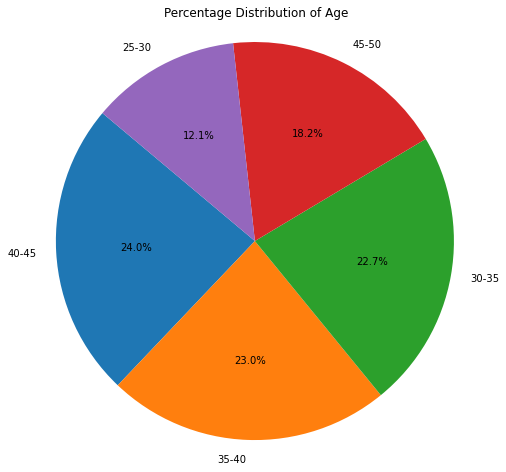

In [86]:
column_name = 'Age'

# Calculate the percentage of each categorical value
percentage = df[column_name].value_counts(normalize=True) * 100

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(percentage, labels=percentage.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.title(f'Percentage Distribution of {column_name}')
plt.show()

In [199]:
column_name = 'Irritable towards baby & partner'

# Calculate the percentage of each categorical value
percentage = df[column_name].value_counts(normalize=True) * 100

print(percentage)

Irritable towards baby & partner
Yes          36.820926
No           33.467471
Sometimes    29.711603
Name: proportion, dtype: float64


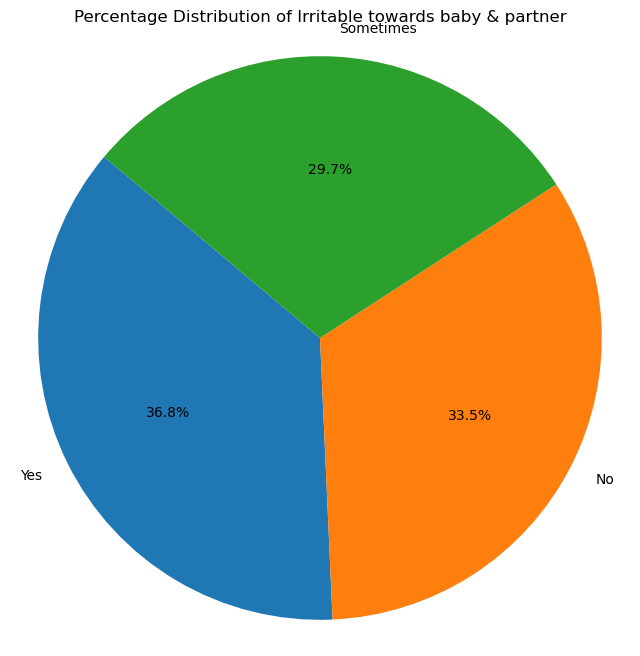

In [23]:
column_name = 'Irritable towards baby & partner'

# Calculate the percentage of each categorical value
percentage = df[column_name].value_counts(normalize=True) * 100

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(percentage, labels=percentage.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.title(f'Percentage Distribution of {column_name}')
plt.show()

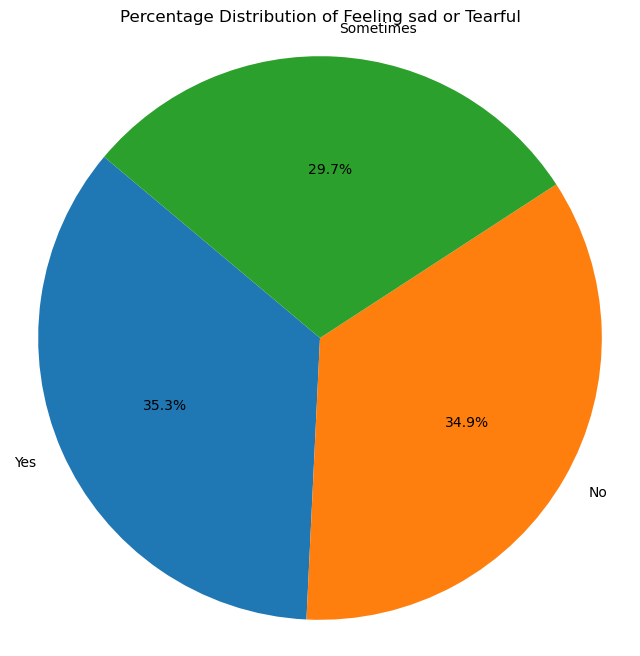

In [200]:
column_name = 'Feeling sad or Tearful'

# Calculate the percentage of each categorical value
percentage = df[column_name].value_counts(normalize=True) * 100

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(percentage, labels=percentage.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.title(f'Percentage Distribution of {column_name}')
plt.show()

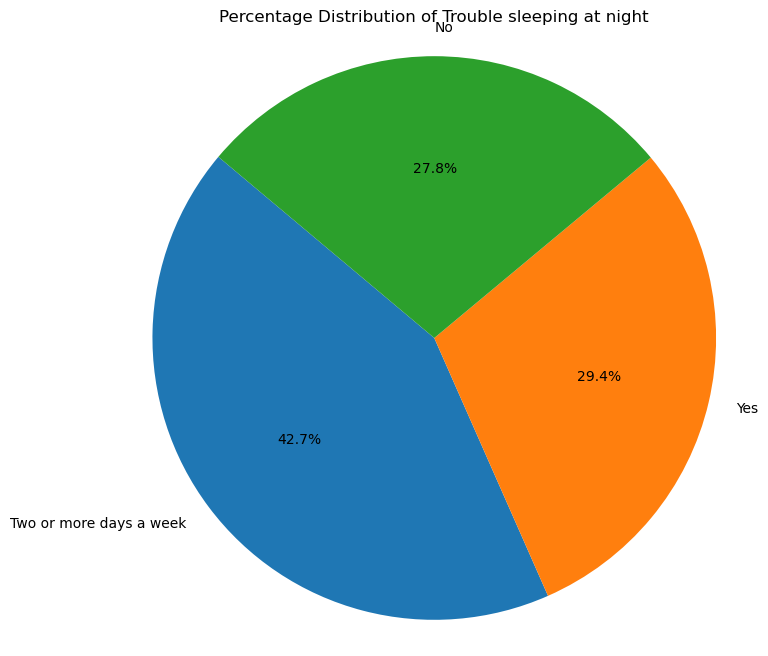

In [108]:
column_name = 'Trouble sleeping at night'

# Calculate the percentage of each categorical value
percentage = df[column_name].value_counts(normalize=True) * 100

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(percentage, labels=percentage.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.title(f'Percentage Distribution of {column_name}')
plt.show()

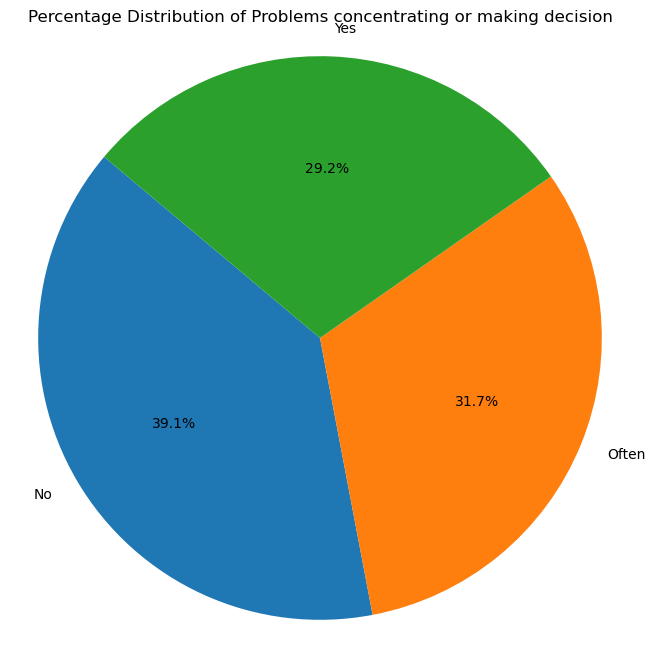

In [201]:
column_name = 'Problems concentrating or making decision'

# Calculate the percentage of each categorical value
percentage = df[column_name].value_counts(normalize=True) * 100

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(percentage, labels=percentage.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.title(f'Percentage Distribution of {column_name}')
plt.show()

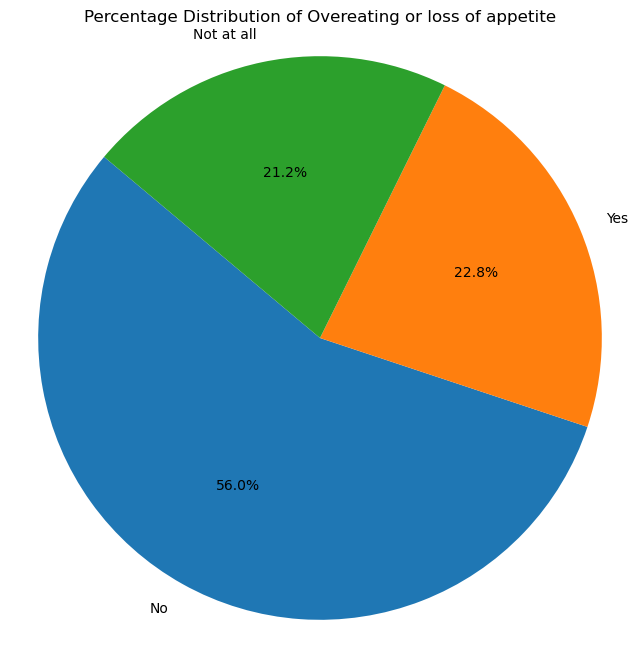

In [202]:
column_name = 'Overeating or loss of appetite'

# Calculate the percentage of each categorical value
percentage = df[column_name].value_counts(normalize=True) * 100

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(percentage, labels=percentage.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.title(f'Percentage Distribution of {column_name}')
plt.show()

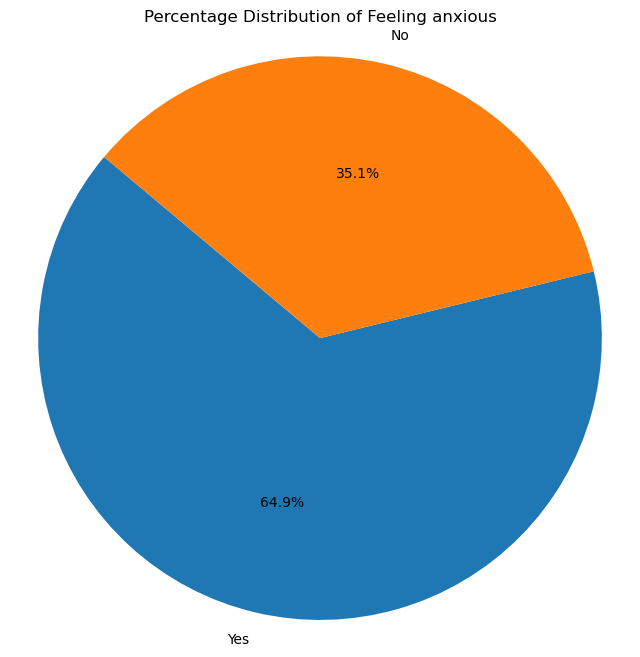

In [203]:
column_name = 'Feeling anxious'

# Calculate the percentage of each categorical value
percentage = df[column_name].value_counts(normalize=True) * 100

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(percentage, labels=percentage.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.title(f'Percentage Distribution of {column_name}')
plt.show()

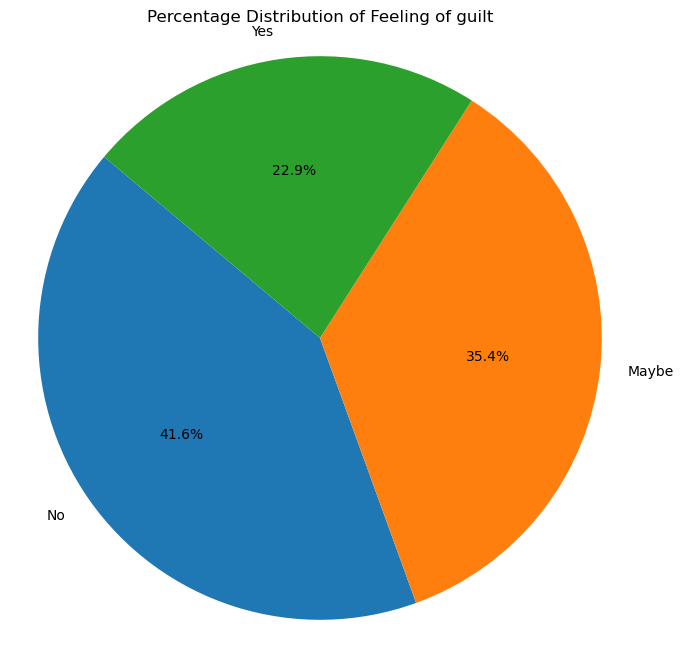

In [204]:
column_name = 'Feeling of guilt'

# Calculate the percentage of each categorical value
percentage = df[column_name].value_counts(normalize=True) * 100

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(percentage, labels=percentage.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.title(f'Percentage Distribution of {column_name}')
plt.show()

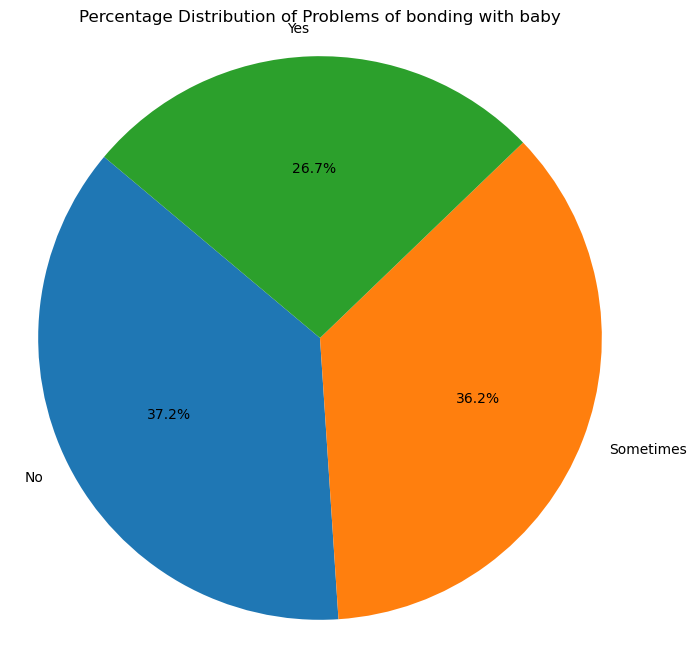

In [205]:
column_name = 'Problems of bonding with baby'

# Calculate the percentage of each categorical value
percentage = df[column_name].value_counts(normalize=True) * 100

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(percentage, labels=percentage.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.title(f'Percentage Distribution of {column_name}')
plt.show()

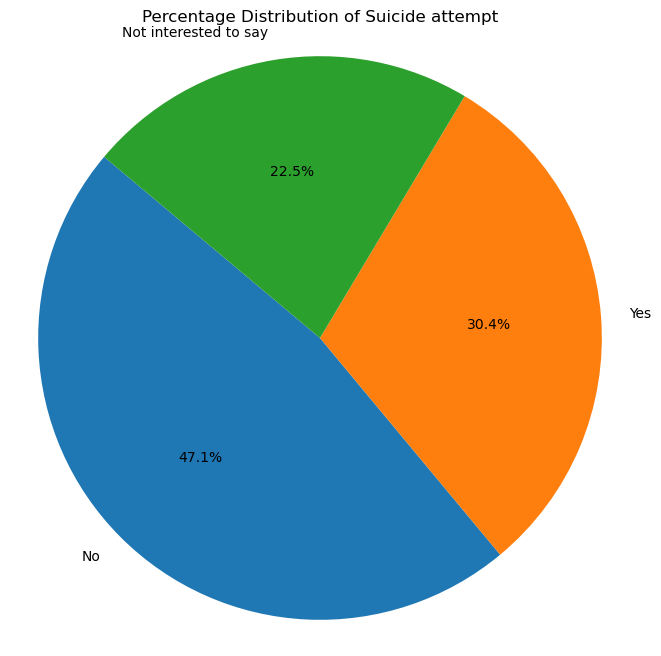

In [206]:
column_name = 'Suicide attempt'

# Calculate the percentage of each categorical value
percentage = df[column_name].value_counts(normalize=True) * 100

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(percentage, labels=percentage.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.title(f'Percentage Distribution of {column_name}')
plt.show()

# Logistic Regression

In [207]:
X = df.drop(['Timestamp'], axis=1)
y = X.pop('Feeling sad or Tearful')  # Assuming this is the target variable

# Encoding categorical variables
X_encoded = pd.get_dummies(X, columns=X.columns, drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Model Training (Logistic Regression)
model = LogisticRegression()
model.fit(X_train, y_train)

# Model Prediction
y_pred = model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")









Accuracy: 0.6287625418060201
Confusion Matrix:
[[69 18 17]
 [13 55 22]
 [21 20 64]]
Classification Report:
              precision    recall  f1-score   support

          No       0.67      0.66      0.67       104
   Sometimes       0.59      0.61      0.60        90
         Yes       0.62      0.61      0.62       105

    accuracy                           0.63       299
   macro avg       0.63      0.63      0.63       299
weighted avg       0.63      0.63      0.63       299



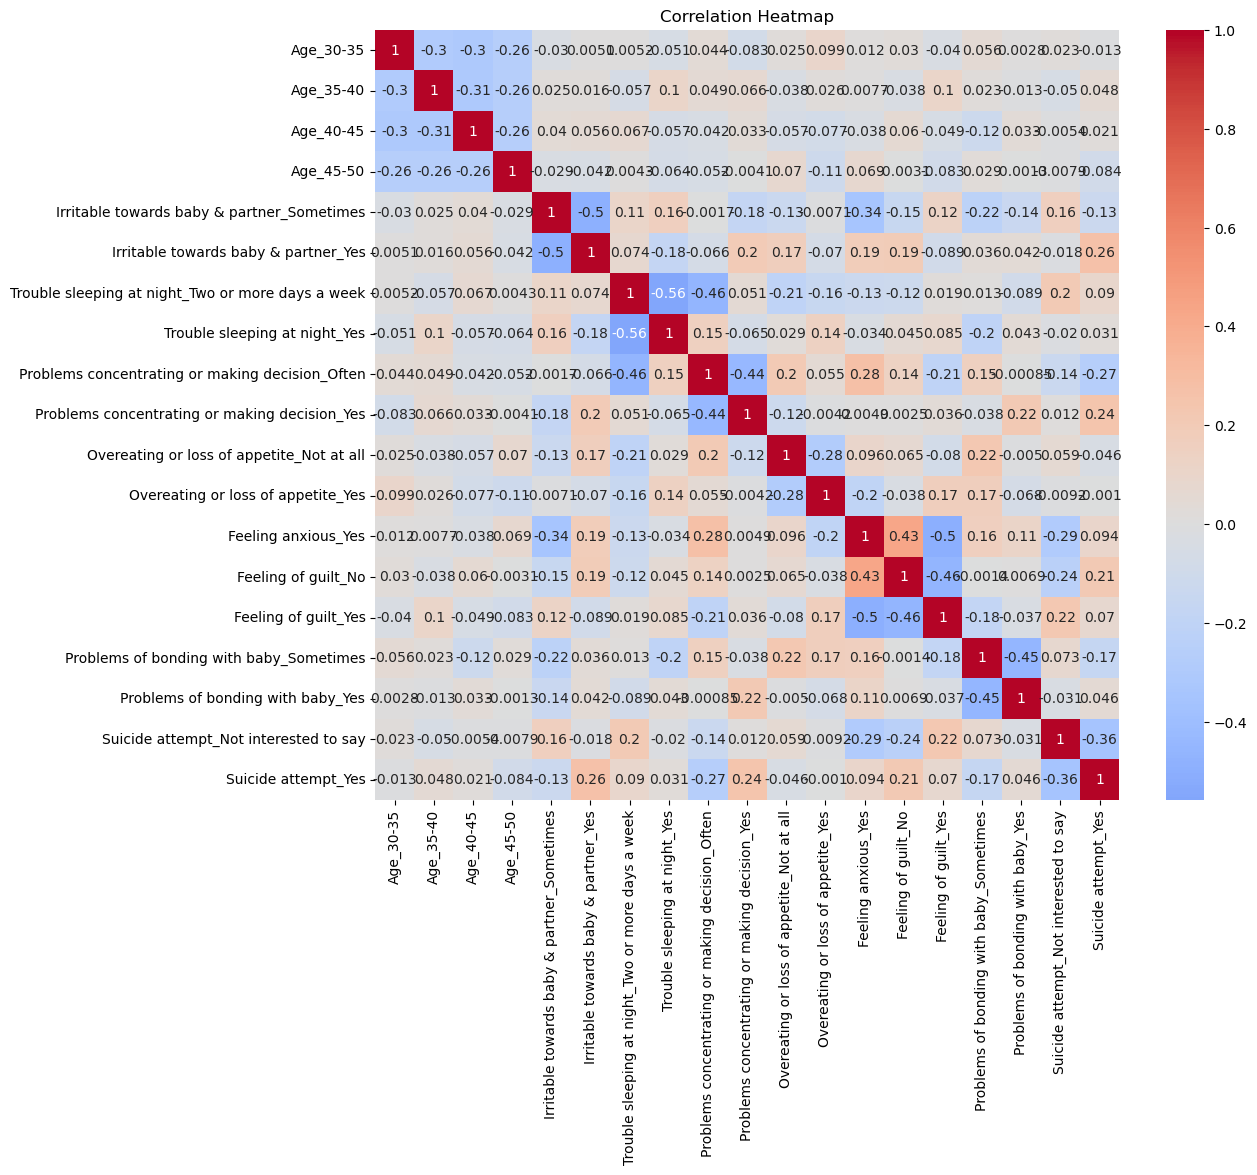

In [208]:
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = X_encoded.corr()

# Data Visualization
plt.figure(figsize=(12, 10), dpi=100)

# Creating a heatmap for the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


# RANDOM FOREST


Accuracy: 0.959866220735786
Confusion Matrix:
[[ 98   2   4]
 [  2  88   0]
 [  4   0 101]]
Classification Report:
              precision    recall  f1-score   support

          No       0.94      0.94      0.94       104
   Sometimes       0.98      0.98      0.98        90
         Yes       0.96      0.96      0.96       105

    accuracy                           0.96       299
   macro avg       0.96      0.96      0.96       299
weighted avg       0.96      0.96      0.96       299



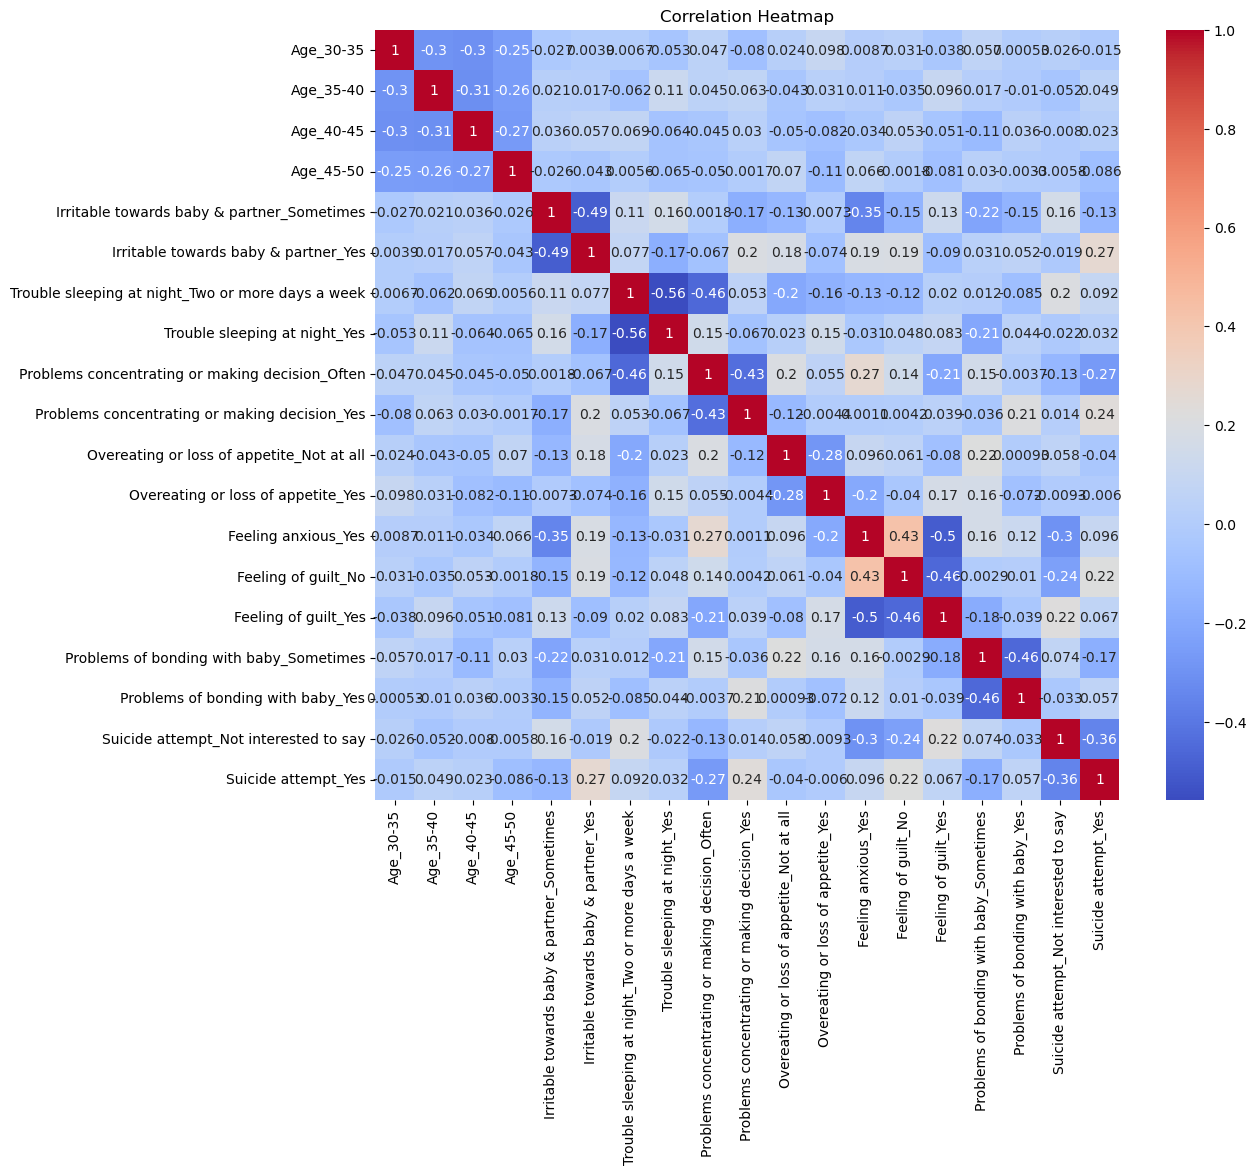

In [209]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


# Model Training (Random Forest)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Model Prediction
y_pred = model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

# Data Visualization
# Heatmap of correlation matrix
plt.figure(figsize=(12, 10), dpi=100)
sns.heatmap(x_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



In [166]:
!pip install xgboost


Defaulting to user installation because normal site-packages is not writeable


# XGBoost

In [210]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [211]:

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")


Accuracy: 0.959866220735786
Confusion Matrix:
[[ 98   2   4]
 [  2  88   0]
 [  4   0 101]]
Classification Report:
              precision    recall  f1-score   support

          No       0.94      0.94      0.94       104
   Sometimes       0.98      0.98      0.98        90
         Yes       0.96      0.96      0.96       105

    accuracy                           0.96       299
   macro avg       0.96      0.96      0.96       299
weighted avg       0.96      0.96      0.96       299



# Support Vector Mchine

In [212]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Accuracy: 0.6956521739130435
Confusion Matrix:
[[71 16 17]
 [13 64 13]
 [19 13 73]]
Classification Report:
              precision    recall  f1-score   support

          No       0.69      0.68      0.69       104
   Sometimes       0.69      0.71      0.70        90
         Yes       0.71      0.70      0.70       105

    accuracy                           0.70       299
   macro avg       0.70      0.70      0.70       299
weighted avg       0.70      0.70      0.70       299



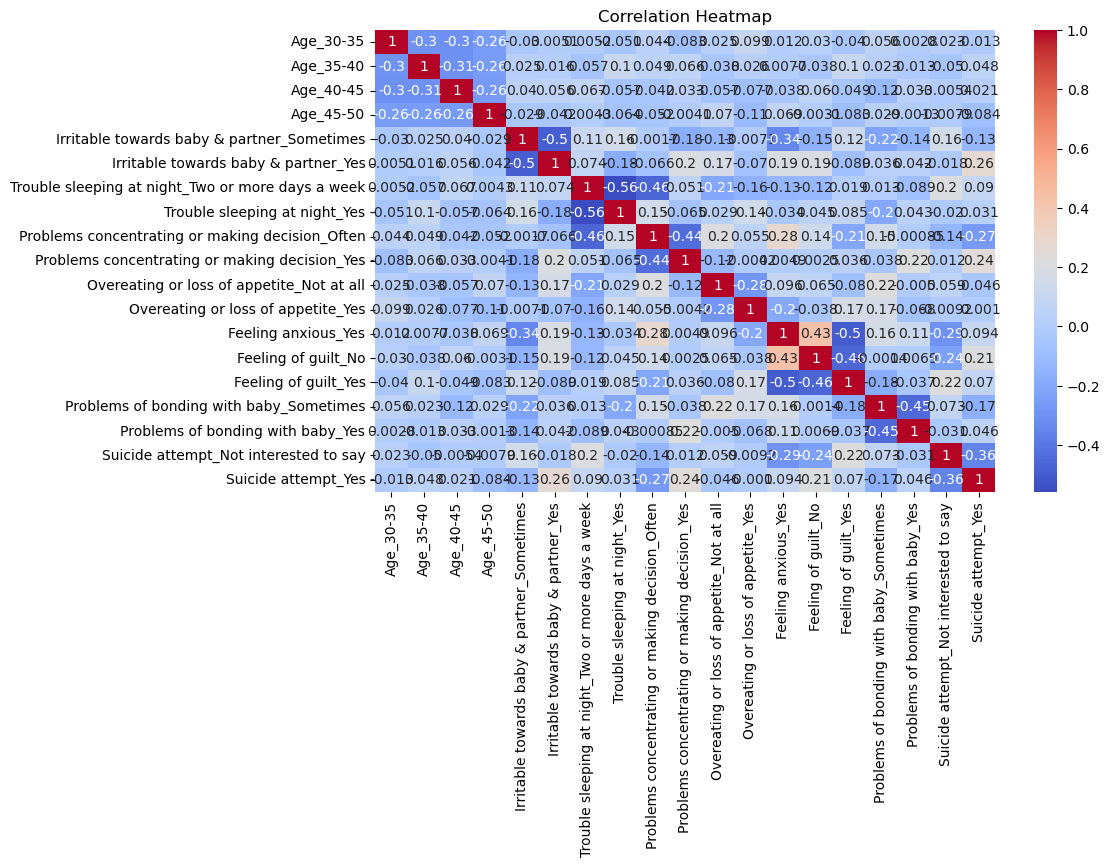

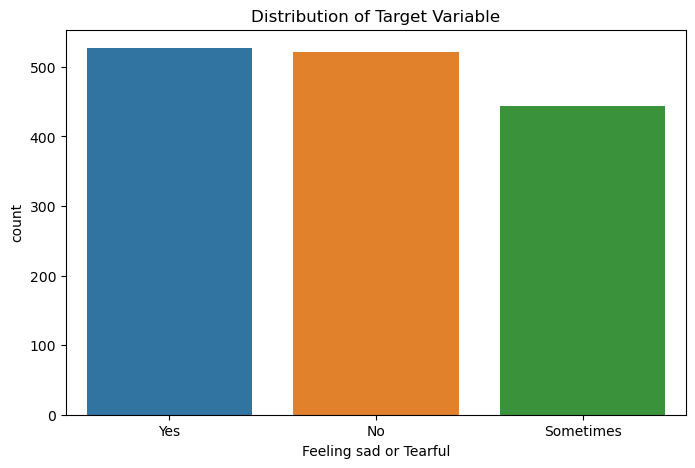

In [213]:
# Model Training (Support Vector Machine)
model = SVC(kernel='linear', random_state=42)  # You can use different kernels (linear, rbf, etc.)
model.fit(X_train, y_train)

# Model Prediction
y_pred = model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

# Data Visualization

corr_matrix = X_encoded.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Exploratory Data Analysis (EDA)

plt.figure(figsize=(8, 5))
sns.countplot(x=y)
plt.title('Distribution of Target Variable')
plt.show()

# KNN Method

Accuracy: 0.822742474916388
Confusion Matrix:
[[86 11  7]
 [ 6 80  4]
 [18  7 80]]
Classification Report:
              precision    recall  f1-score   support

          No       0.78      0.83      0.80       104
   Sometimes       0.82      0.89      0.85        90
         Yes       0.88      0.76      0.82       105

    accuracy                           0.82       299
   macro avg       0.83      0.83      0.82       299
weighted avg       0.83      0.82      0.82       299



C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


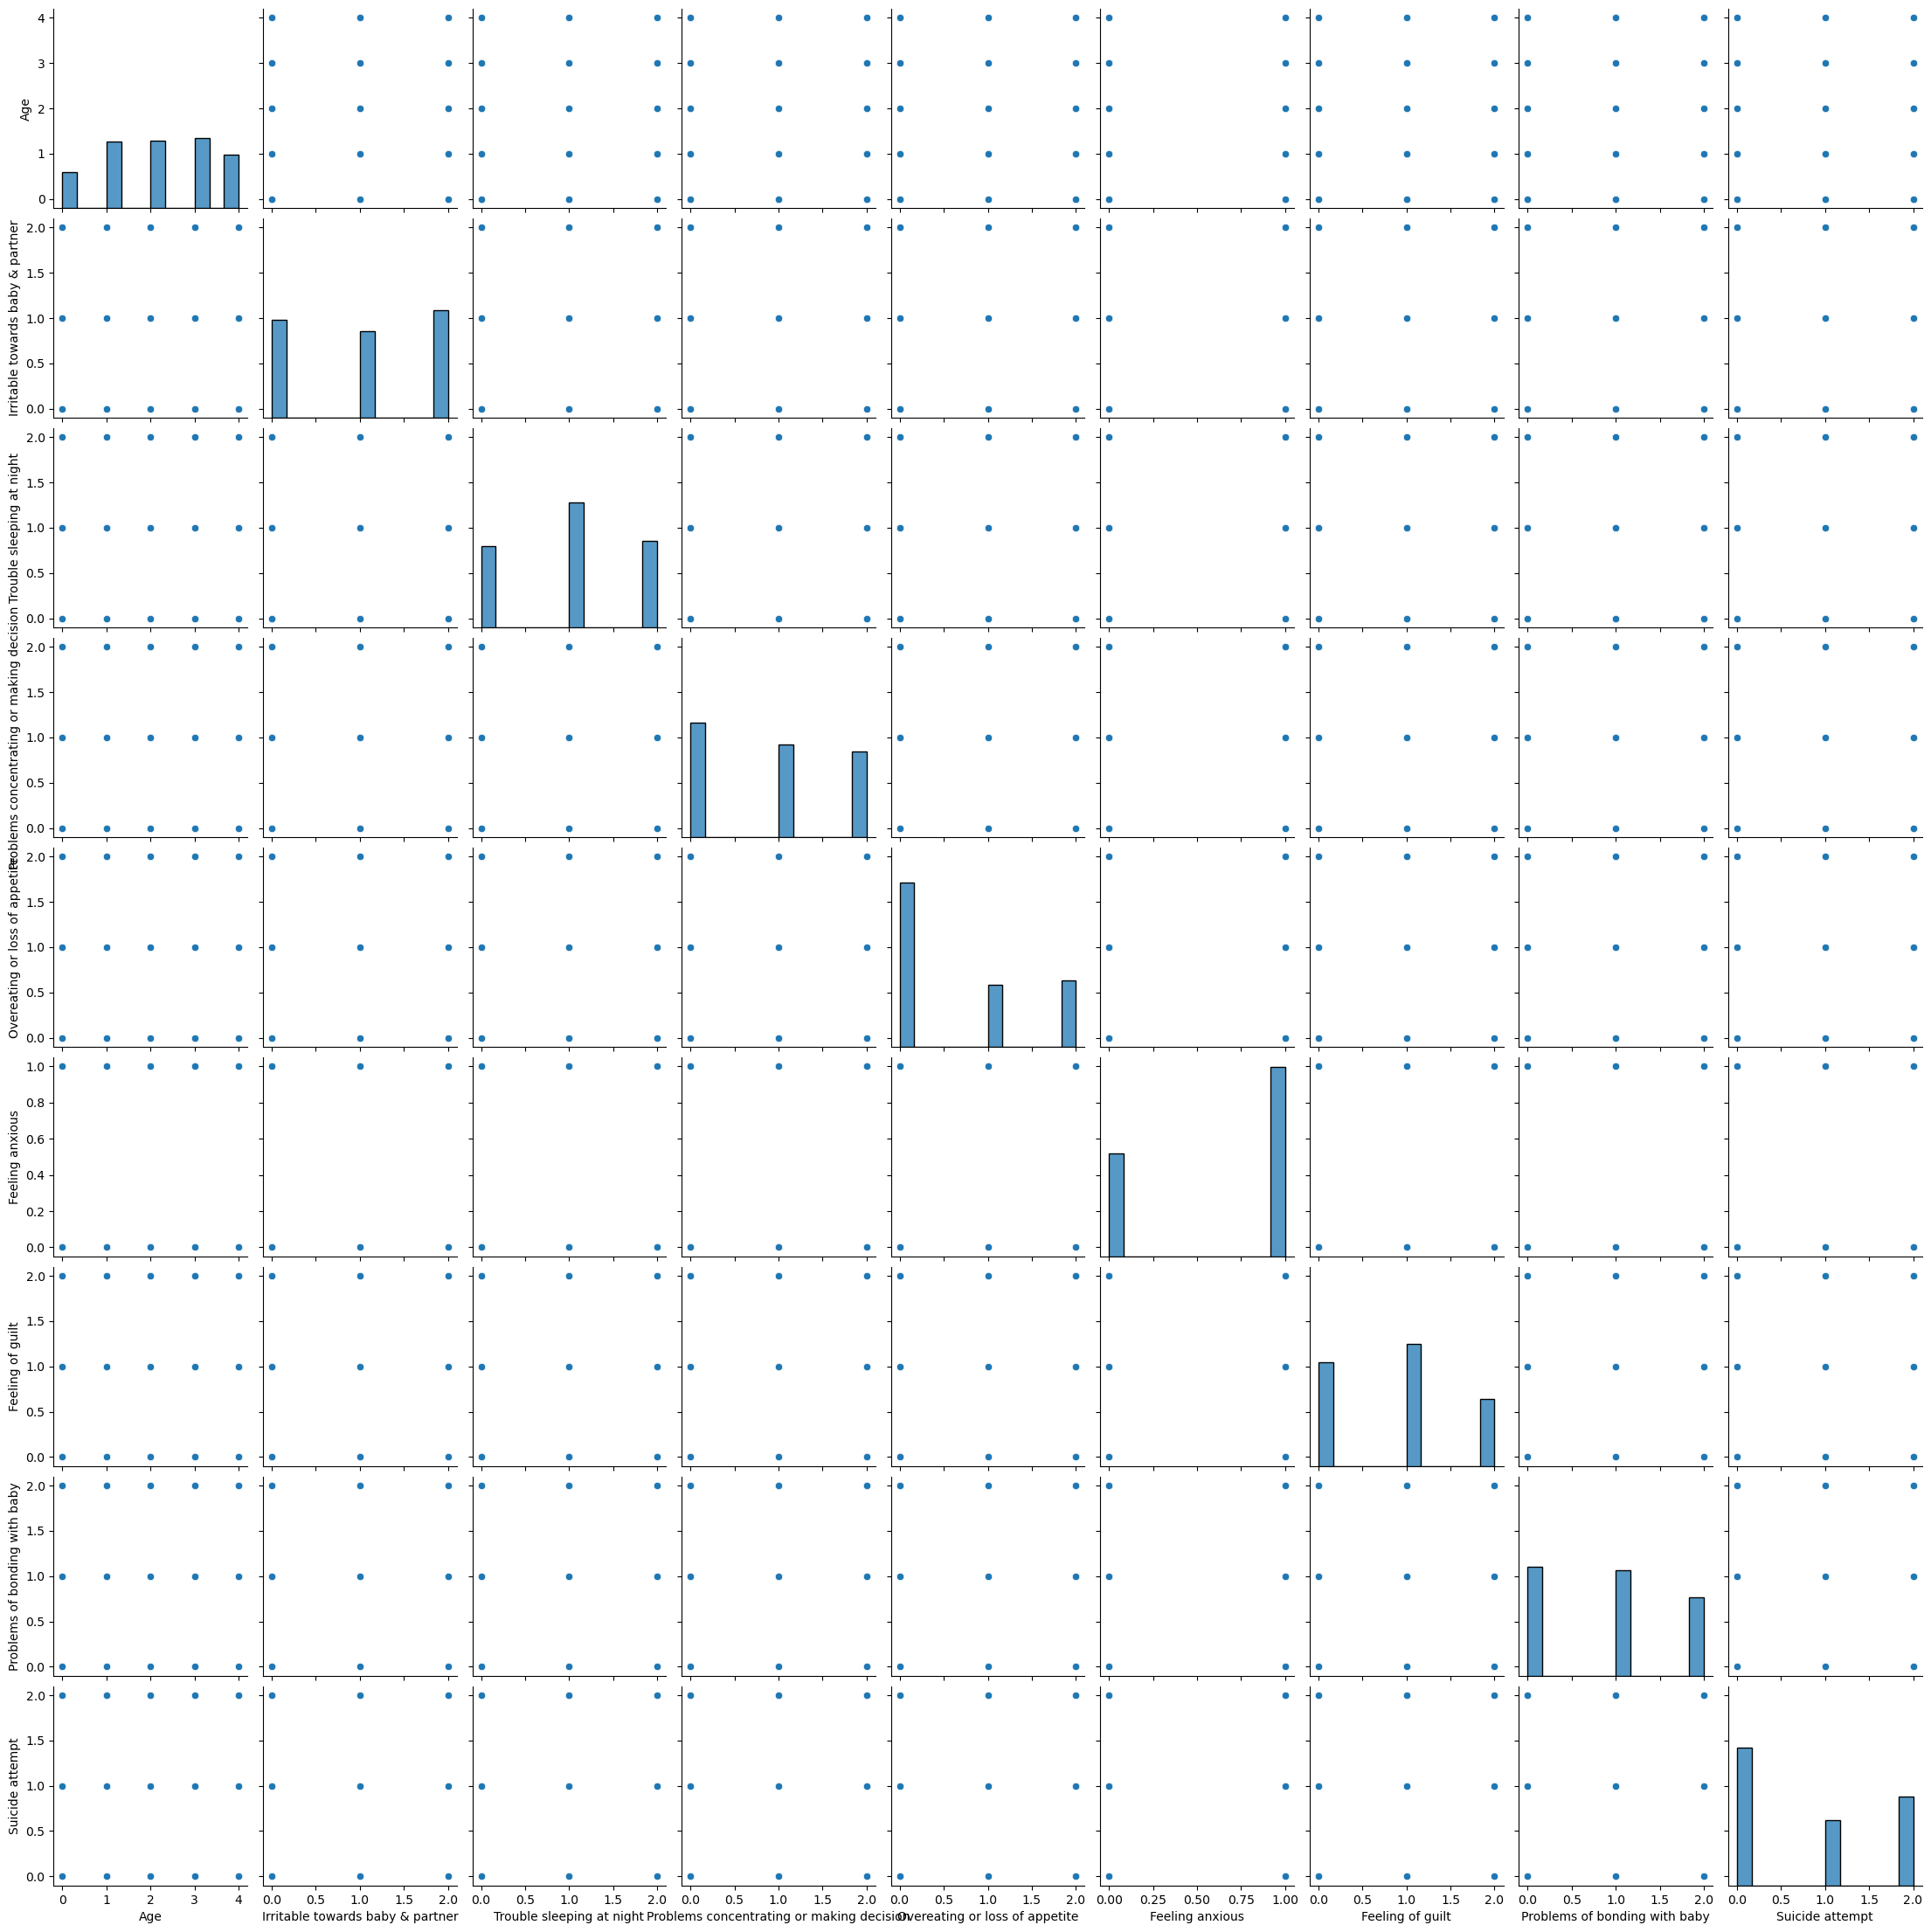

In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Encoding categorical variables
le = LabelEncoder()
X_encoded = X.apply(le.fit_transform)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Feature scaling (optional but recommended for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training (K-Nearest Neighbors)
k = 5  # Number of neighbors
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train_scaled, y_train)

# Model Prediction
y_pred = model.predict(X_test_scaled)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

sns.pairplot(X_encoded)
plt.show()


In [172]:
!pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable
